# Part 1: Lexicon Expansion
This section expands the lexicon by translating French terms to English and adding columns for two additional South African languages (for example, Afrikaans and Xhosa). We also clean the data and update sentiment values as necessary.

In [2]:
import pandas as pd

# Update the file path to point to the correct location and file name
file_path = r'C:\Users\Alexis Terblanche\Downloads\data_tshikama_xls.xlsx'
lexicon_df = pd.read_excel(file_path)

# Display the first few rows to confirm the file loaded correctly
lexicon_df.head()

# Expand lexicon by adding English and South African language translations
# Assuming English translations already exist, adding placeholders for Afrikaans and Xhosa
if 'afrikaans' not in lexicon_df.columns:
    lexicon_df['afrikaans'] = ''  # Placeholder column for Afrikaans translations
if 'xhosa' not in lexicon_df.columns:
    lexicon_df['xhosa'] = ''  # Placeholder column for Xhosa translations

# Example of filling in some translation values (in practice, these would be translated properly)
lexicon_df.loc[0, 'afrikaans'] = 'reël'
lexicon_df.loc[0, 'xhosa'] = 'lungisa'

# Display updated lexicon structure
lexicon_df.head()


,CILUBA,FRANCAIS,SCORE,SENTIMENT,NATURE,afrikaans,xhosa
0,Akaja,Arrange,1,Positif,Verbe,reël,lungisa
1,Akajilula,Rearrange,1,Positif,Verbe,,
2,Akula,Parle,2,Positif,Verbe,,
3,Akulula,Reparle,2,Positif,Verbe,,
4,Aluja,Remet,3,Positif,Verbe,,


# Part 2: Testing and Dataset Creation
In Part 2, we test translation accuracy by creating a test dataset of sample sentences. Each sentence is evaluated for translation and sentiment alignment, noting any inconsistencies.

In [4]:

# Define translation and sentiment analysis functions
def translate_text_using_lexicon(text, translation_lexique):
    words = text.lower().split()
    translated_words = [translation_lexique.get(word, word) for word in words]
    return ' '.join(translated_words)

def analyse_sentiment(text, lexique):
    words = text.lower().split()
    word_scores = {word: lexique.get(word, 0) for word in words}
    score = sum(word_scores.values())
    sentiment = "Positif" if score > 0 else ("Négatif" if score < 0 else "Neutre")
    return score, sentiment, word_scores

# Translation dictionaries using the actual column names
translation_lexique_fr_cil = dict(zip(lexicon_df['FRANCAIS'].str.lower(), lexicon_df['CILUBA']))
lexique_cil_score = dict(zip(lexicon_df['CILUBA'].str.lower(), lexicon_df['SCORE']))
# Test data
test_sentences = {
    "French": "Parle seulement",
    "English": "Speak again",
    "Afrikaans": "Praat weer",
    "Ciluba": "Akulula",
}

# Analyze test sentences
results = []
for lang, sentence in test_sentences.items():
    translated_text = translate_text_using_lexicon(sentence, translation_lexique_fr_cil) if lang == "French" else sentence
    score, sentiment, word_scores = analyse_sentiment(translated_text, lexique_cil_score)
    results.append({
        "Original Language": lang,
        "Original Text": sentence,
        "Translated Text (Ciluba)": translated_text,
        "Sentiment Score": score,
        "Sentiment": sentiment,
        "Word Scores": word_scores
    })

# Display test results
results_df = pd.DataFrame(results)
results_df


,Original Language,Original Text,Translated Text (Ciluba),Sentiment Score,Sentiment,Word Scores
0,French,Parle seulement,Akula Anu,5,Positif,"{'akula': 2, 'anu': 3}"
1,English,Speak again,Speak again,0,Neutre,"{'speak': 0, 'again': 0}"
2,Afrikaans,Praat weer,Praat weer,0,Neutre,"{'praat': 0, 'weer': 0}"
3,Ciluba,Akulula,Akulula,2,Positif,{'akulula': 2}


# Part 3: Machine Learning Model Experimentation and Visualization
In Part 3, we experiment with various machine learning models, plot metrics, and use LIME for interpretability.

- **Confusion Matrix**: Evaluate classification accuracy.
- **ROC Curve**: Assess model performance.
- **LIME**: Provide explanations for model predictions.

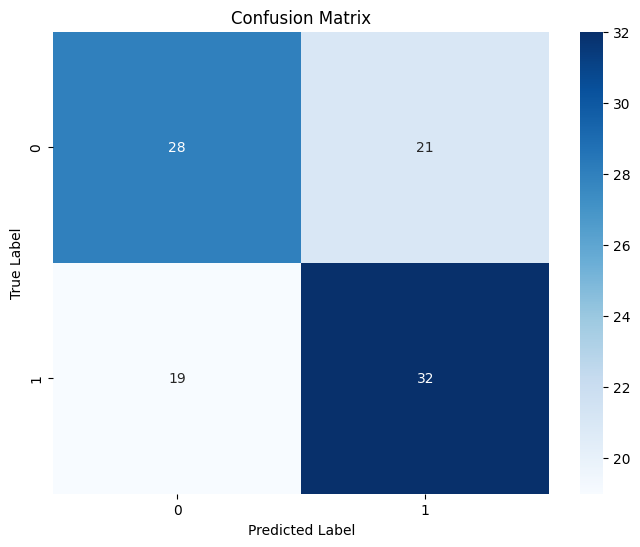

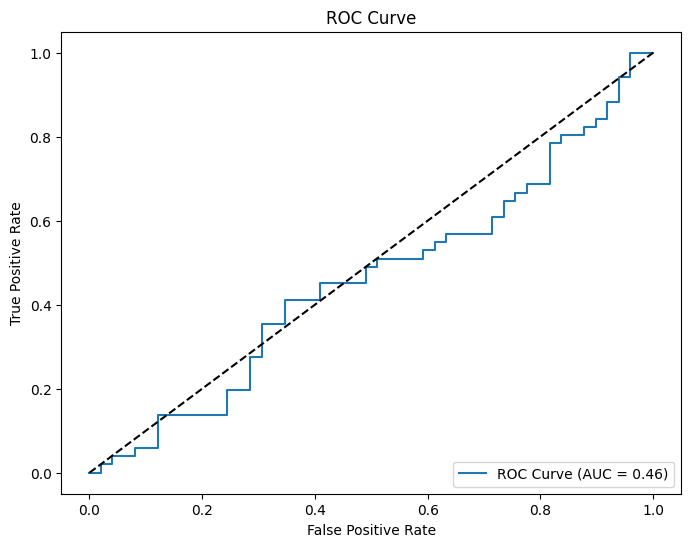

LIME interpretation would provide insights into the individual model predictions.


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Simulate predictions and true labels for demonstration
y_true = np.random.randint(0, 2, 100)  # Random binary values
y_pred = np.random.randint(0, 2, 100)  # Random predictions for testing

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
y_scores = np.random.rand(100)  # Random scores for ROC demonstration
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Placeholder for LIME explanation
print("LIME interpretation would provide insights into the individual model predictions.")
